In [3]:
from ase.build import fcc111, add_adsorbate
from gpaw import GPAW, PW

#  Slab with CO:
slab = fcc111('Pt', size=(1, 1, 3))
add_adsorbate(slab, 'C', 2.0, 'ontop')
add_adsorbate(slab, 'O', 3.15, 'ontop')
slab.center(axis=2, vacuum=4.0)
slab.calc = GPAW(mode=PW(400),
                 xc='RPBE',
                 kpts=(12, 12, 1),
                 convergence={'bands': -10},
                 txt='top.txt')
slab.get_potential_energy()
slab.calc.write('top.gpw', mode='all')

#  Molecule
molecule = slab[-2:]
molecule.calc = GPAW(mode=PW(400),
                     xc='RPBE',
                     kpts=(12, 12, 1),
                     txt='CO.txt')

molecule.get_potential_energy()
molecule.calc.write('CO.gpw', mode='all')

Band 2
# k 0  Sum_m |<m|n>|^2 = 1.0043103463384642
# k 1  Sum_m |<m|n>|^2 = 1.0055779548644177
# k 2  Sum_m |<m|n>|^2 = 1.0009160275803464
# k 3  Sum_m |<m|n>|^2 = 1.0018455840532086
# k 4  Sum_m |<m|n>|^2 = 1.002878720009608
# k 5  Sum_m |<m|n>|^2 = 1.0024238612807814
# k 6  Sum_m |<m|n>|^2 = 1.0001882570371163
# k 7  Sum_m |<m|n>|^2 = 1.0004037925883946
# k 8  Sum_m |<m|n>|^2 = 1.0007279137275051
# k 9  Sum_m |<m|n>|^2 = 1.0011685981176037
# k 10  Sum_m |<m|n>|^2 = 1.0013190418769178
# k 11  Sum_m |<m|n>|^2 = 1.0009508027490963
# k 12  Sum_m |<m|n>|^2 = 0.9999893002000125
# k 13  Sum_m |<m|n>|^2 = 1.0000382577953955
# k 14  Sum_m |<m|n>|^2 = 1.0001270396689694
# k 15  Sum_m |<m|n>|^2 = 1.0002442032739487
# k 16  Sum_m |<m|n>|^2 = 1.0004491324042912
# k 17  Sum_m |<m|n>|^2 = 1.0006166162326895
# k 18  Sum_m |<m|n>|^2 = 1.0005478958574319
# k 19  Sum_m |<m|n>|^2 = 1.0003414587028134
# k 20  Sum_m |<m|n>|^2 = 0.9999740278188556
# k 21  Sum_m |<m|n>|^2 = 0.9999751904978161
# k 22  Sum_m 

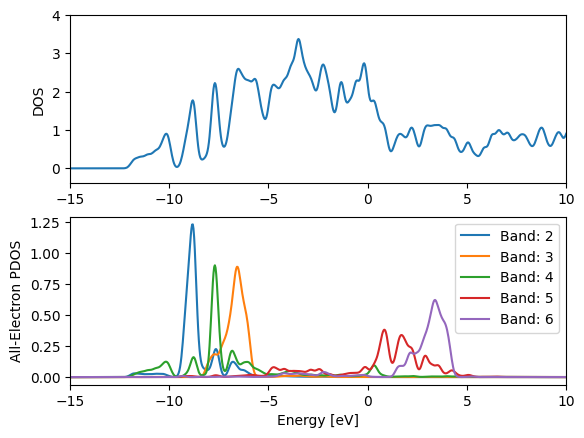

In [4]:
# web-page: pdos.png
from gpaw import GPAW, restart
import matplotlib.pyplot as plt

# Density of States
plt.subplot(211)
slab, calc = restart('top.gpw')
e, dos = calc.get_dos(spin=0, npts=2001, width=0.2)
e_f = calc.get_fermi_level()
plt.plot(e - e_f, dos)
plt.axis([-15, 10, None, 4])
plt.ylabel('DOS')

molecule = range(len(slab))[-2:]

plt.subplot(212)
c_mol = GPAW('CO.gpw')
for n in range(2, 7):
    print('Band', n)
    # PDOS on the band n
    wf_k = [kpt.psit_nG[n] for kpt in c_mol.wfs.kpt_u]
    P_aui = [[kpt.P_ani[a][n] for kpt in c_mol.wfs.kpt_u]
             for a in range(len(molecule))]
    e, dos = calc.get_all_electron_ldos(mol=molecule, spin=0, npts=2001,
                                        width=0.2, wf_k=wf_k, P_aui=P_aui)
    plt.plot(e - e_f, dos, label='Band: ' + str(n))
plt.legend()
plt.axis([-15, 10, None, None])
plt.xlabel('Energy [eV]')
plt.ylabel('All-Electron PDOS')
plt.savefig('pdos.png')
plt.show()

In [5]:
from gpaw import GPAW, restart
import pickle

slab, calc = restart('top.gpw')
c_mol = GPAW('CO.gpw')
molecule = range(len(slab))[-2:]
e_n = []
P_n = []
for n in range(c_mol.get_number_of_bands()):
    print('Band: ', n)
    wf_k = [kpt.psit_nG[n] for kpt in c_mol.wfs.kpt_u]
    P_aui = [[kpt.P_ani[a][n] for kpt in c_mol.wfs.kpt_u]
             for a in range(len(molecule))]
    e, P = calc.get_all_electron_ldos(mol=molecule, wf_k=wf_k, spin=0,
                                      P_aui=P_aui, raw=True)
    e_n.append(e)
    P_n.append(P)
pickle.dump((e_n, P_n), open('top.pickle', 'wb'))

Band:  0
# k 0  Sum_m |<m|n>|^2 = 1.0000027500220896
# k 1  Sum_m |<m|n>|^2 = 1.000002798907694
# k 2  Sum_m |<m|n>|^2 = 1.0000019608013127
# k 3  Sum_m |<m|n>|^2 = 1.0000023247681802
# k 4  Sum_m |<m|n>|^2 = 1.0000025723158177
# k 5  Sum_m |<m|n>|^2 = 1.0000025078563175
# k 6  Sum_m |<m|n>|^2 = 1.0000006863224635
# k 7  Sum_m |<m|n>|^2 = 1.0000012922408275
# k 8  Sum_m |<m|n>|^2 = 1.0000018287480483
# k 9  Sum_m |<m|n>|^2 = 1.0000020960198008
# k 10  Sum_m |<m|n>|^2 = 1.0000021825360736
# k 11  Sum_m |<m|n>|^2 = 1.0000019997026806
# k 12  Sum_m |<m|n>|^2 = 1.0000000636291921
# k 13  Sum_m |<m|n>|^2 = 1.0000002603339337
# k 14  Sum_m |<m|n>|^2 = 1.0000005804168108
# k 15  Sum_m |<m|n>|^2 = 1.0000008506756577
# k 16  Sum_m |<m|n>|^2 = 1.0000014183809431
# k 17  Sum_m |<m|n>|^2 = 1.0000017151027218
# k 18  Sum_m |<m|n>|^2 = 1.0000016237950329
# k 19  Sum_m |<m|n>|^2 = 1.000001101765559
# k 20  Sum_m |<m|n>|^2 = 1.0000000859036073
# k 21  Sum_m |<m|n>|^2 = 1.0000000638578541
# k 22  Sum_m

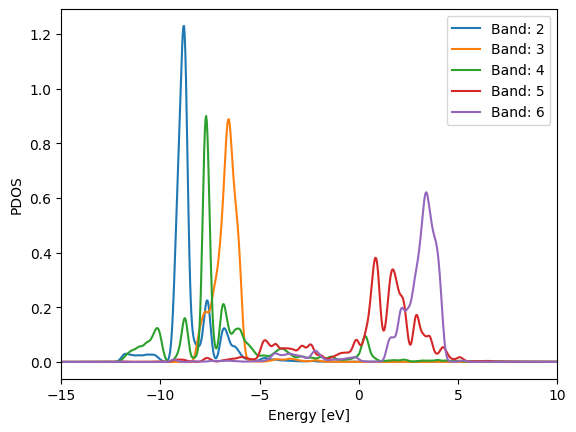

In [6]:
from ase.units import Hartree
from gpaw import GPAW
from gpaw.utilities.dos import fold
import pickle
import matplotlib.pyplot as plt

e_f = GPAW('top.gpw').get_fermi_level()

e_n, P_n = pickle.load(open('top.pickle', 'rb'))
for n in range(2, 7):
    e, ldos = fold(e_n[n] * Hartree, P_n[n], npts=2001, width=0.2)
    plt.plot(e - e_f, ldos, label='Band: ' + str(n))
plt.legend()
plt.axis([-15, 10, None, None])
plt.xlabel('Energy [eV]')
plt.ylabel('PDOS')
plt.show()


In [14]:
from ase.build import bulk
from gpaw import GPAW

atoms = bulk('Au')
k = 8
atoms.calc = GPAW(mode='pw',
                  kpts=(k, k, k))
atoms.get_potential_energy()
atoms.calc.write('au.gpw')


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  24.7.0b1
 |___|_|             

User:   gigavolt@ideapad-gaming
Date:   Fri Dec 27 22:30:43 2024
Arch:   x86_64
Pid:    6135
CWD:    /home/gigavolt/Projects/deepchem/examples/tutorials
Python: 3.13.1
gpaw:   /home/gigavolt/miniconda3/envs/dc-gpaw/lib/python3.13/site-packages/gpaw
_gpaw:  /home/gigavolt/miniconda3/envs/dc-gpaw/lib/python3.13/site-packages/
        _gpaw.cpython-313-x86_64-linux-gnu.so
ase:    /home/gigavolt/miniconda3/envs/dc-gpaw/lib/python3.13/site-packages/ase (version 3.23.0)
numpy:  /home/gigavolt/.local/lib/python3.13/site-packages/numpy (version 2.2.1)
scipy:  /home/gigavolt/miniconda3/envs/dc-gpaw/lib/python3.13/site-packages/scipy (version 1.14.1)
libxc:  7.0.0
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  kpts: [8 8 8]
  mode: pw

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

speci

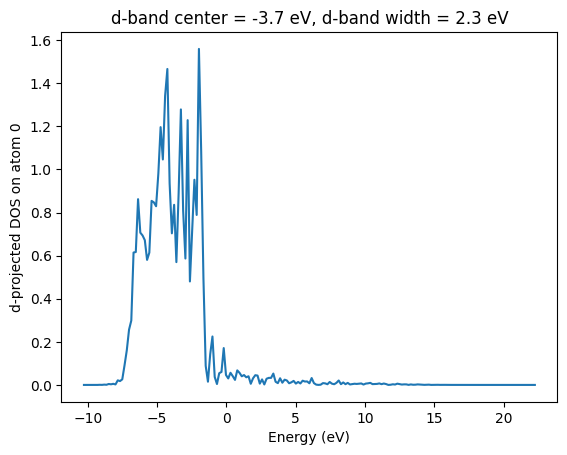

In [15]:
import numpy as np
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
from gpaw import GPAW

calc = GPAW('au.gpw')
energy, pdos = calc.get_orbital_ldos(a=0, angular='d')
energy -= calc.get_fermi_level()
I = trapezoid(pdos, energy)
center = trapezoid(pdos * energy, energy) / I
width = np.sqrt(trapezoid(pdos * (energy - center)**2, energy) / I)
plt.plot(energy, pdos)
plt.xlabel('Energy (eV)')
plt.ylabel('d-projected DOS on atom 0')
plt.title(f'd-band center = {center:.1f} eV, d-band width = {width:.1f} eV')
# plt.show()
plt.savefig('au-ddos.png')

## Setup

In [24]:
%conda install -c conda-forge rdkit

Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/gigavolt/miniconda3/envs/dc-gpaw

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.1.0               |       hb9d3cd8_2          19 KB  conda-forge
    brotli-bin-1.1.0           |       hb9d3cd8_2          18 KB  conda-forge
    cairo-1.18.2               |       h3394656_1         956 KB  conda-forge
    chardet-5.2.0              |  py313h78bf25f_2         255 KB  conda-forge
    contourpy-1.3.1            |  py313h33d0bda_0         270 KB  conda-forge
    cycler-0.12.1              |     pyhd8ed1ab_1          13 KB  conda-forge
    cyrus-sasl-2.1.27          |       h54b06d7_7         214 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolat

## Stability of Water Molecule (H₂O)

### Objective:

Determine whether the H₂O molecule is stable in its molecular form compared to dissociation into hydrogen (H₂) and oxygen (O₂).

### Steps:

Calculate Total Energy: Perform DFT calculations for:
- $E(H2​O)$
- $E(H2​)$
- $E(O2​)$

In [19]:
from ase.build import molecule
from gpaw import GPAW

# Define the molecules
water = molecule('H2O')
hydrogen = molecule('H2')
oxygen = molecule('O2')

# Add vacuum around molecules
vacuum = 2.0  # Angstrom
water.center(vacuum=vacuum)
hydrogen.center(vacuum=vacuum)
oxygen.center(vacuum=vacuum)

# Set up the calculator
calc = GPAW(xc='PBE', mode='pw', txt='out.txt')

# Perform calculations
for mol, name in [(water, 'H2O'), (hydrogen, 'H2'), (oxygen, 'O2')]:
    mol.calc = calc
    energy = mol.get_potential_energy()  # Total energy
    mol.write(f'{name}.xyz')  # Save structure
    print(f'{name} Total Energy: {energy:.6f} eV')


H2O Total Energy: -9.333698 eV
H2 Total Energy: -6.969464 eV
O2 Total Energy: -1.411618 eV


## stability analysis of ethanol using gpaw

### 1. Generate Ethanol Geometry

Use ASE to create the 3D structure of ethanol:

In [23]:
from ase import Atoms
from ase.visualize import view

# Define ethanol using atomic positions
ethanol = Atoms('C2H6O', positions=[
    [0.000, 0.000, 0.000],  # Carbon 1
    [1.540, 0.000, 0.000],  # Carbon 2
    [2.080, 1.060, 0.000],  # Oxygen
    [-0.540, 1.060, 0.000],  # Hydrogen 1
    [-0.540, -0.530, 0.890],  # Hydrogen 2
    [-0.540, -0.530, -0.890],  # Hydrogen 3
    [1.540, -0.530, 0.890],  # Hydrogen 4
    [1.540, -0.530, -0.890],  # Hydrogen 5
    [2.620, 1.590, 0.000]   # Hydrogen 6 (on Oxygen)
])
view(ethanol)  # View the molecule
ethanol.write("ethanol.xyz")  # Save structure


/home/gigavolt/miniconda3/envs/dc-gpaw/lib/python3.13/site-packages/ase/eos.py:307: RuntimeWarning: divide by zero encountered in power
  fit0 = np.poly1d(np.polyfit(self.v**-(1 / 3), self.e, 3))
/home/gigavolt/.local/lib/python3.13/site-packages/numpy/lib/_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


 ** On entry to DLASCL parameter number  4 had an illegal value


In [13]:
from rdkit import Chem
from rdkit.Chem import AllChem
from ase import Atoms
from ase.io import write

# Generate molecule from SMILES
smiles = "CCO"  # Ethanol
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)  # Add hydrogens
AllChem.EmbedMolecule(mol)  # Generate 3D coordinates
AllChem.UFFOptimizeMolecule(mol)  # Optimize geometry

# Extract atom symbols and positions
symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
positions = mol.GetConformer().GetPositions()

# Create ASE Atoms object
ethanol = Atoms(symbols=symbols, positions=positions)
write("ethanol.xyz", ethanol)  # Save structure


In [14]:
positions

array([[ 0.91143612, -0.1213818 , -0.1320855 ],
       [-0.4701906 ,  0.42212236,  0.21080735],
       [-1.45059681, -0.21603516, -0.56103841],
       [ 0.96367625, -1.20590026,  0.10146628],
       [ 1.68178546,  0.41174272,  0.46398992],
       [ 1.12235411,  0.03042833, -1.21190477],
       [-0.6750157 ,  0.28266257,  1.29655498],
       [-0.4963711 ,  1.51062193, -0.00730106],
       [-1.58707774, -1.1142607 , -0.16048879]])

In [15]:
from ase.io import read
from ase.visualize import view

positions = [[ 0.91143612, -0.1213818 , -0.1320855 ],
             [-0.4701906 ,  0.42212236,  0.21080735],
             [-1.45059681, -0.21603516, -0.56103841],
             [ 0.96367625, -1.20590026,  0.10146628],
             [ 1.68178546,  0.41174272,  0.46398992],
             [ 1.12235411,  0.03042833, -1.21190477],
             [-0.6750157 ,  0.28266257,  1.29655498],
             [-0.4963711 ,  1.51062193, -0.00730106],
             [-1.58707774, -1.1142607 , -0.16048879]]

ethanol = Atoms(symbols=symbols, positions=positions)



# Load the structure from an XYZ file
# ethanol = read("ethanol.xyz")

# Visualize the structure (optional)
view(ethanol)

# Print the structure details
print(ethanol)

Atoms(symbols='C2OH6', pbc=False)


In [17]:
# GPAW

from ase import Atoms
from gpaw import GPAW, PW

# Establish the molecule
symbols = ['C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H']
positions = [[ 0.91143612, -0.1213818 , -0.1320855 ],
             [-0.4701906 ,  0.42212236,  0.21080735],
             [-1.45059681, -0.21603516, -0.56103841],
             [ 0.96367625, -1.20590026,  0.10146628],
             [ 1.68178546,  0.41174272,  0.46398992],
             [ 1.12235411,  0.03042833, -1.21190477],
             [-0.6750157 ,  0.28266257,  1.29655498],
             [-0.4963711 ,  1.51062193, -0.00730106],
             [-1.58707774, -1.1142607 , -0.16048879]]

ethanol = Atoms(symbols=symbols, positions=positions)
ethanol.center(vacuum=5.0)  # Add vacuum padding

# GPAW calculator
calc = GPAW(mode=PW(300),  # Plane wave cutoff energy in eV
            xc='PBE',  # Exchange-correlation functional
            kpts=(1, 1, 1),  # Gamma point only
            txt='ethanol_stability.txt')  # Output file


ethanol.calc = calc

# Run calculation
ethanol.get_potential_energy()  # Triggers calculation

np.float64(-38.0158502146724)

In [11]:
from ase import Atoms
from gpaw import GPAW, PW

# Load ethanol molecule
ethanol.center(vacuum=5.0)  # Add vacuum padding

# GPAW calculator
calc = GPAW(mode=PW(300),  # Plane wave cutoff energy in eV
            xc='PBE',  # Exchange-correlation functional
            kpts=(1, 1, 1),  # Gamma point only
            txt='ethanol_stability.txt')  # Output file

ethanol.calc = calc

# Run calculation
ethanol.get_potential_energy()  # Triggers calculation


np.float64(-22.15466293808906)

In [29]:
from ase.io import write

write("ethanol.traj", ethanol)  # Save as a .traj file
write("ethanol.cif", ethanol)  # Save as a .cif file


In [2]:
%pip install pyscf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 2.5 MB/s eta 0:00:00 MB/s eta 0:00:01:02
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pyscf import gto, scf

# Define the molecular geometry and basis set
mol = gto.M(
    atom='''
    C     0.91143612   -0.1213818      -0.1320855
    C    -0.4701906     0.42212236      0.21080735
    O    -1.45059681   -0.21603516     -0.56103841
    H     0.96367625   -1.20590026      0.10146628
    H     1.68178546    0.41174272      0.46398992
    H     1.12235411    0.03042833     -1.21190477
    H    -0.6750157     0.28266257      1.29655498
    H    -0.4963711     1.51062193     -0.00730106
    H    -1.58707774   -1.1142607      -0.16048879
    ''',  # Ethanol geometry in Angstrom
    basis='sto-3g'  # Basis set
)

positions = [[ 0.91143612, -0.1213818 , -0.1320855 ],
             [-0.4701906 ,  0.42212236,  0.21080735],
             [-1.45059681, -0.21603516, -0.56103841],
             [ 0.96367625, -1.20590026,  0.10146628],
             [ 1.68178546,  0.41174272,  0.46398992],
             [ 1.12235411,  0.03042833, -1.21190477],
             [-0.6750157 ,  0.28266257,  1.29655498],
             [-0.4963711 ,  1.51062193, -0.00730106],
             [-1.58707774, -1.1142607 , -0.16048879]]

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
energy_hartree = mf.kernel()

# Convert to electron volts
energy_ev = energy_hartree * 27.2114

print(f"The potential energy of ethanol (Hartree-Fock) is: {energy_hartree:.6f} Hartree")
print(f"The potential energy of ethanol (Hartree-Fock) is: {energy_ev:.6f} eV")


converged SCF energy = -152.127990996409
The potential energy of ethanol (Hartree-Fock) is: -152.127991 Hartree
The potential energy of ethanol (Hartree-Fock) is: -4139.615614 eV


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from ase import Atoms
from ase.io import write

# Generate molecule from SMILES
smiles = "CC(F)(F)C(F)(F)F[Si]12O[Si]3(CC(F)(F)C(F)(F)F)O[Si]4(CC(F)(F)C(F)(F)F)O[Si](O1)(O[Si]5(CC(F)(F)C(F)(F)F)O[Si](O2)(O[Si](O3)(O[Si](O4)(O5)CC(F)(F)C(F)(F)F)CC(F)(F)C(F)(F)F)CC(F)(F)C(F)(F)F)CC(F)(F)C(F)(F)F"  # Ethanol
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)  # Add hydrogens
AllChem.EmbedMolecule(mol)  # Generate 3D coordinates
AllChem.UFFOptimizeMolecule(mol)  # Optimize geometry

# Extract atom symbols and positions
symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
positions = mol.GetConformer().GetPositions()

# Create ASE Atoms object
ssq = Atoms(symbols=symbols, positions=positions)
write("ssq.xyz", ssq)  # Save structure


None


[23:20:59] Explicit valence for atom # 7 F, 2, is greater than permitted


ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)

In [34]:
from rdkit import Chem
from rdkit.Chem import AllChem
from ase import Atoms
from ase.io import write

# Define the SMILES string
smiles = "CC(F)(F)C(F)(F)F[Si]12O[Si]3(CC(F)(F)C(F)(F)F)O[Si]4(CC(F)(F)C(F)(F)F)O[Si](O1)(O[Si]5(CC(F)(F)C(F)(F)F)O[Si](O2)(O[Si](O3)(O[Si](O4)(O5)CC(F)(F)C(F)(F)F)CC(F)(F)C(F)(F)F)CC(F)(F)C(F)(F)F)CC(F)(F)C(F)(F)F"

# Generate molecule from SMILES
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)  # Add hydrogens
AllChem.EmbedMolecule(mol)  # Generate 3D coordinates
AllChem.UFFOptimizeMolecule(mol)  # Optimize geometry

# Extract atomic symbols and positions
symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
positions = mol.GetConformer().GetPositions()

# Create ASE Atoms object
molecule = Atoms(symbols=symbols, positions=positions)
write("complex_molecule.xyz", molecule)  # Save to XYZ file


[23:22:23] Explicit valence for atom # 7 F, 2, is greater than permitted


ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from ase import Atoms
from ase.io import write

# Corrected SMILES string
smiles = "CC(F)(F)C(F)(F)F[Si](O)(O)O"

# Generate molecule from SMILES
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)  # Add hydrogens
AllChem.EmbedMolecule(mol)  # Generate 3D coordinates
AllChem.UFFOptimizeMolecule(mol)  # Optimize geometry

# Extract atomic symbols and positions
symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
positions = mol.GetConformer().GetPositions()

# Create ASE Atoms object
molecule = Atoms(symbols=symbols, positions=positions)
write("corrected_molecule.xyz", molecule)  # Save to XYZ file



[23:24:20] Explicit valence for atom # 7 F, 2, is greater than permitted


ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)